In [17]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 设置 Matplotlib 以正确显示中文和负号
# Note: This block is for displaying Chinese characters in plots. 
# It can be removed if you don't need Chinese characters in your charts.
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

# 加载我们在第三周生成的特征数据
try:
    # 将数据加载到名为 features_df 的变量中
    features_df = pd.read_csv('data/features_technical.csv', index_col='Date', parse_dates=True)
    print("Successfully loaded 'data/features_technical.csv'")
    
    # --- 这里是修正的部分 ---
    # 使用正确的变量名 features_df 来获取最大索引值
    print("Data time range:", features_df.index.min(), "to", features_df.index.max())
    print("Included stock tickers:", features_df['Ticker'].unique())

except FileNotFoundError:
    print("Error: File not found 'data/features_technical.csv'. Please ensure the file exists in the 'data' folder.")
    # 如果文件不存在,您可能需要重新运行之前的特征工程脚本
    features_df = None

# 检查数据是否成功加载
if features_df is not None:
    print("\nData loaded successfully. You can now proceed with the analysis.")
    # 显示数据的前几行以进行快速检查
    # The display() function is specific to environments like Jupyter Notebooks/IPython.
    # If running as a standard .py script, you would use print(features_df.head()).
    try:
        display(features_df.head())
    except NameError:
        print(features_df.head())

Successfully loaded 'data/features_technical.csv'
Data time range: 2000-03-14 00:00:00 to 2025-10-24 00:00:00
Included stock tickers: ['AAPL' 'ABNB' 'ADBE' 'ADI' 'ADP' 'ADSK' 'AEP' 'AMAT' 'AMD' 'AMGN' 'AMZN'
 'APP' 'ARM' 'ASML' 'AVGO' 'AXON' 'AZN' 'BIIB' 'BKNG' 'BKR' 'CCEP' 'CDNS'
 'CDW' 'CEG' 'CHTR' 'CMCSA' 'COST' 'CPRT' 'CRWD' 'CSCO' 'CSGP' 'CSX'
 'CTAS' 'CTSH' 'DASH' 'DDOG' 'DXCM' 'EA' 'EXC' 'FANG' 'FAST' 'FTNT' 'GEHC'
 'GFS' 'GILD' 'GOOG' 'GOOGL' 'HON' 'IDXX' 'INTC' 'INTU' 'ISRG' 'KDP' 'KHC'
 'KLAC' 'LIN' 'LRCX' 'LULU' 'MAR' 'MCHP' 'MDLZ' 'MELI' 'META' 'MNST'
 'MRVL' 'MSFT' 'MSTR' 'MU' 'NFLX' 'NVDA' 'NXPI' 'ODFL' 'ON' 'ORLY' 'PANW'
 'PAYX' 'PCAR' 'PDD' 'PEP' 'PLTR' 'PYPL' 'QCOM' 'REGN' 'ROP' 'ROST' 'SBUX'
 'SHOP' 'SNPS' 'TEAM' 'TMUS' 'TRI' 'TSLA' 'TTD' 'TTWO' 'TXN' 'VRSK' 'VRTX'
 'WBD' 'WDAY' 'XEL' 'ZS']

Data loaded successfully. You can now proceed with the analysis.


,Ticker,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,...,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,ATRr_14,volatility_20d,return_1d,return_3d,return_5d
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-14,AAPL,0.909750,0.932500,0.855573,0.857449,428579200,0.892049,0.830715,0.889972,0.830715,...,0.804480,0.892049,0.979618,19.633222,0.302443,0.055030,0.043784,-0.058218,-0.065440,-0.070194
2000-03-15,AAPL,0.867769,0.902480,0.856511,0.872459,443609600,0.891017,0.831363,0.888304,0.832352,...,0.803015,0.891017,0.979019,19.753220,0.394561,0.054382,0.044001,0.017506,-0.075547,-0.047132
2000-03-16,AAPL,0.880434,0.915614,0.859325,0.912330,378100800,0.893808,0.834224,0.890592,0.835489,...,0.806879,0.893808,0.980736,19.451276,0.606535,0.054519,0.043464,0.045699,0.002061,-0.005624
2000-03-17,AAPL,0.901542,0.938128,0.897789,0.938128,305043200,0.897607,0.837376,0.895119,0.839514,...,0.809868,0.897607,0.985347,19.549625,0.730917,0.053506,0.043870,0.028278,0.094092,-0.005965
2000-03-20,AAPL,0.926872,0.947510,0.918428,0.923118,204489600,0.902016,0.841579,0.897786,0.842792,...,0.818791,0.902016,0.985242,18.453172,0.626776,0.051761,0.041613,-0.016000,0.058065,0.013910


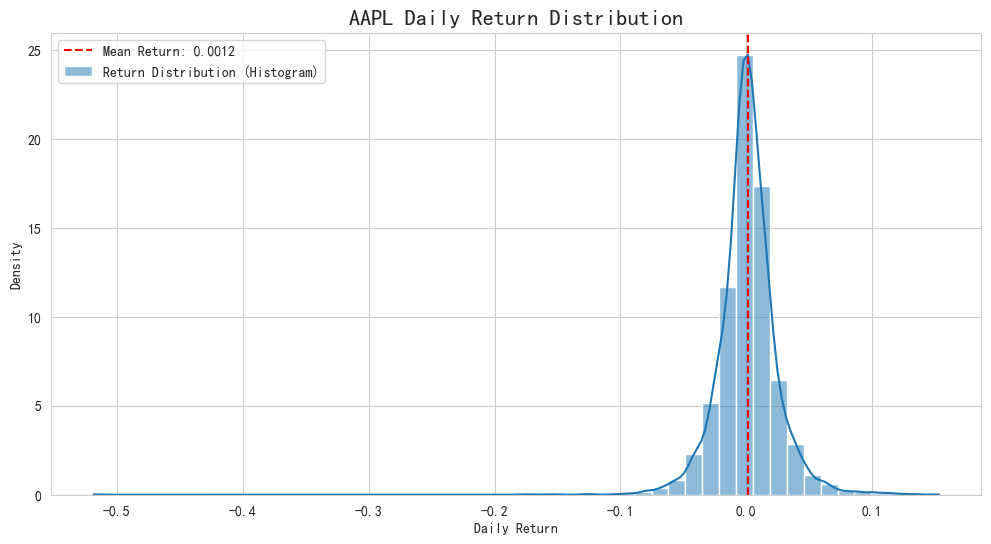

AAPL Return Statistics:
count    6444.000000
mean        0.001182
std         0.024091
min        -0.518692
25%        -0.009739
50%         0.000942
75%         0.012486
max         0.153289
Name: return_1d, dtype: float64


In [13]:
if features_df is not None:
    # 选择一只股票进行分析，例如苹果 (AAPL)
    TICKER_TO_ANALYZE = 'AAPL'
    aapl_returns = features_df[features_df['Ticker'] == TICKER_TO_ANALYZE]['return_1d'].dropna()

    # 创建图表
    plt.figure(figsize=(12, 6))

    # 绘制直方图和核密度估计图 (KDE)
    sns.histplot(aapl_returns, bins=50, kde=True, stat="density", label='Return Distribution (Histogram)')

    # 计算均值和标准差，并在图上标注
    mean_return = aapl_returns.mean()
    std_return = aapl_returns.std()

    plt.axvline(mean_return, color='r', linestyle='--', label=f'Mean Return: {mean_return:.4f}')

    plt.title(f'{TICKER_TO_ANALYZE} Daily Return Distribution', fontsize=16)
    plt.xlabel('Daily Return')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # 打印一些关键统计数据
    print(f"{TICKER_TO_ANALYZE} Return Statistics:")
    print(aapl_returns.describe())

C:\Users\ROG\AppData\Local\Temp\ipykernel_26144\3852126245.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_mean_returns.values, y=sector_mean_returns.index, palette='viridis')


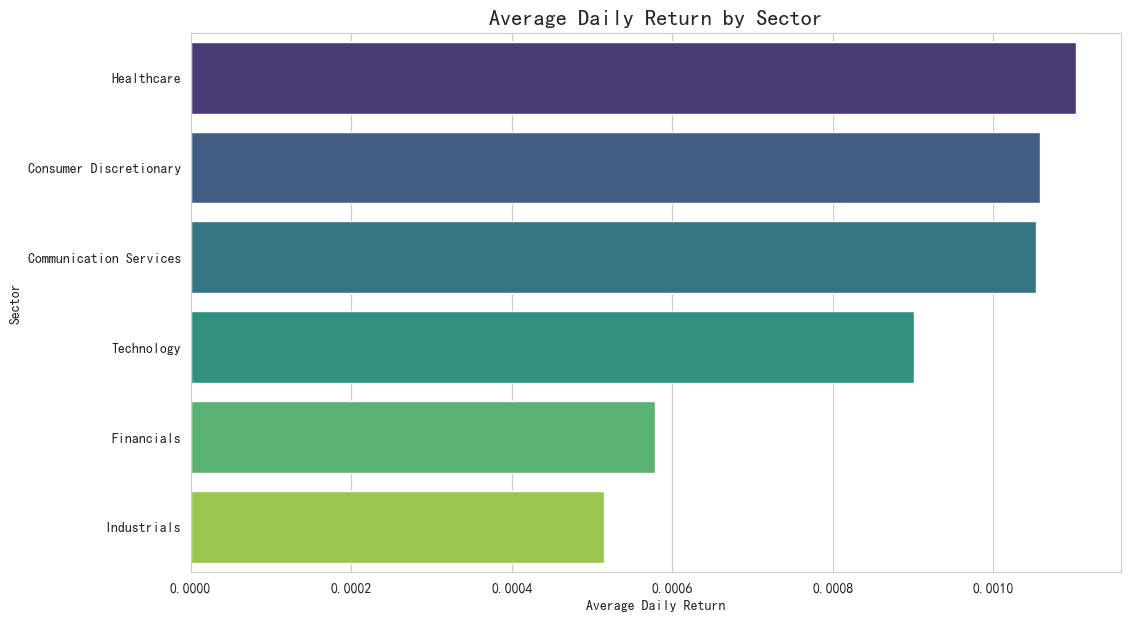

Average Daily Return by Sector:
Sector
Healthcare                0.001103
Consumer Discretionary    0.001058
Communication Services    0.001052
Technology                0.000901
Financials                0.000579
Industrials               0.000515
Name: return_1d, dtype: float64


In [14]:
# 1. 创建一个简化的板块映射字典 (这里只列举部分知名公司作为示例)
sector_map = {
    'Technology': ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ADBE', 'CSCO', 'INTC'],
    'Consumer Discretionary': ['AMZN', 'TSLA', 'SBUX', 'BKNG', 'MAR'],
    'Healthcare': ['JNJ', 'LLY', 'MRNA', 'ISRG', 'VRTX'],
    'Communication Services': ['GOOGL', 'GOOG', 'META', 'NFLX', 'CMCSA'],
    'Financials': ['PYPL', 'BK', 'CME'],
    'Industrials': ['HON', 'BA', 'CAT']
}

# 2. 将字典转换为更易于使用的格式
ticker_to_sector = {ticker: sector for sector, tickers in sector_map.items() for ticker in tickers}

if features_df is not None:
    # 3. 在 DataFrame 中创建 'Sector' 列
    # 我们只保留在 sector_map 中定义的股票进行比较
    df_with_sectors = features_df[features_df['Ticker'].isin(ticker_to_sector.keys())].copy()
    df_with_sectors['Sector'] = df_with_sectors['Ticker'].map(ticker_to_sector)

    # 4. 按板块分组并计算平均每日收益率
    sector_mean_returns = df_with_sectors.groupby('Sector')['return_1d'].mean().sort_values(ascending=False)

    # 5. 绘制条形图进行比较
    plt.figure(figsize=(12, 7))
    sns.barplot(x=sector_mean_returns.values, y=sector_mean_returns.index, palette='viridis')
    plt.title('Average Daily Return by Sector', fontsize=16)
    plt.xlabel('Average Daily Return')
    plt.ylabel('Sector')
    plt.show()

    print("Average Daily Return by Sector:")
    print(sector_mean_returns)

In [15]:
import os
import pandas as pd # 确保 pandas 已导入

# (假设 final_df 已经在这个单元格或之前的单元格中被创建)
# ... 之前的代码 ...
# print(f"\n查看 AAPL 数据末尾, 确认目标列的计算结果 (末尾应为 NaN):")
# print(final_df[final_df['Ticker'] == 'AAPL'].tail())

print("\nCreating prediction targets...")

# 将最终处理好的数据存储起来, 这是我们的“黄金”数据集
# 您的项目结构中有 'finalized' 目录, 我们把它存到那里
output_path = 'data/finalized/data_with_targets.csv'

# --- 这是新增的稳健性代码 ---
# 1. 从完整的文件路径中提取出目录部分
output_dir = os.path.dirname(output_path)
# 2. 创建目录, 如果目录已存在则什么也不做 (exist_ok=True)
os.makedirs(output_dir, exist_ok=True)
# --- 新增代码结束 ---

# 3. 现在可以安全地保存文件了
final_df.to_csv(output_path)

print(f"\nSuccessfully created prediction targets and saved to '{output_path}'")
print("New target columns:")
# (这里可以加上您之前查看 AAPL 数据的代码, 或者其他检查代码)
display(final_df.tail())


Creating prediction targets...

Successfully created prediction targets and saved to 'data/finalized/data_with_targets.csv'
New target columns:


,Ticker,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,...,ATRr_14,volatility_20d,return_1d,return_3d,return_5d,target_1d_return,target_5d_return,target_21d_return,target_63d_return,target_126d_return
Date,,,,,,,,,,,,,,,,,,,,,
2025-10-20,ZS,301.269989,307.190002,301.269989,305.899994,880700,301.432500,287.193000,300.629250,292.589698,...,9.544967,8.754286,0.018818,0.011741,-0.022809,0.014613,NaN,NaN,NaN,NaN
2025-10-21,ZS,305.739990,311.290009,303.779999,310.369995,748500,302.486499,287.976800,301.556940,293.286965,...,9.399613,8.480111,0.014613,0.037194,0.028396,-0.007894,NaN,NaN,NaN,NaN
2025-10-22,ZS,308.980011,311.339996,302.579987,307.920013,1171400,303.661499,288.626600,302.162947,293.860810,...,9.353927,7.404998,-0.007894,0.025545,0.018422,0.035236,NaN,NaN,NaN,NaN
2025-10-23,ZS,308.000000,319.205994,307.994995,318.769989,1397100,305.266998,289.446600,303.744570,294.837641,...,9.491931,6.994393,0.035236,0.042073,0.065265,0.013270,NaN,NaN,NaN,NaN
2025-10-24,ZS,321.380005,327.394989,321.000000,323.000000,1063200,306.684499,290.486801,305.578421,295.942047,...,9.430007,7.577882,0.013270,0.040693,0.075770,NaN,NaN,NaN,NaN,NaN


Successfully loaded existing data from 'data/finalized/data_with_targets.csv'.


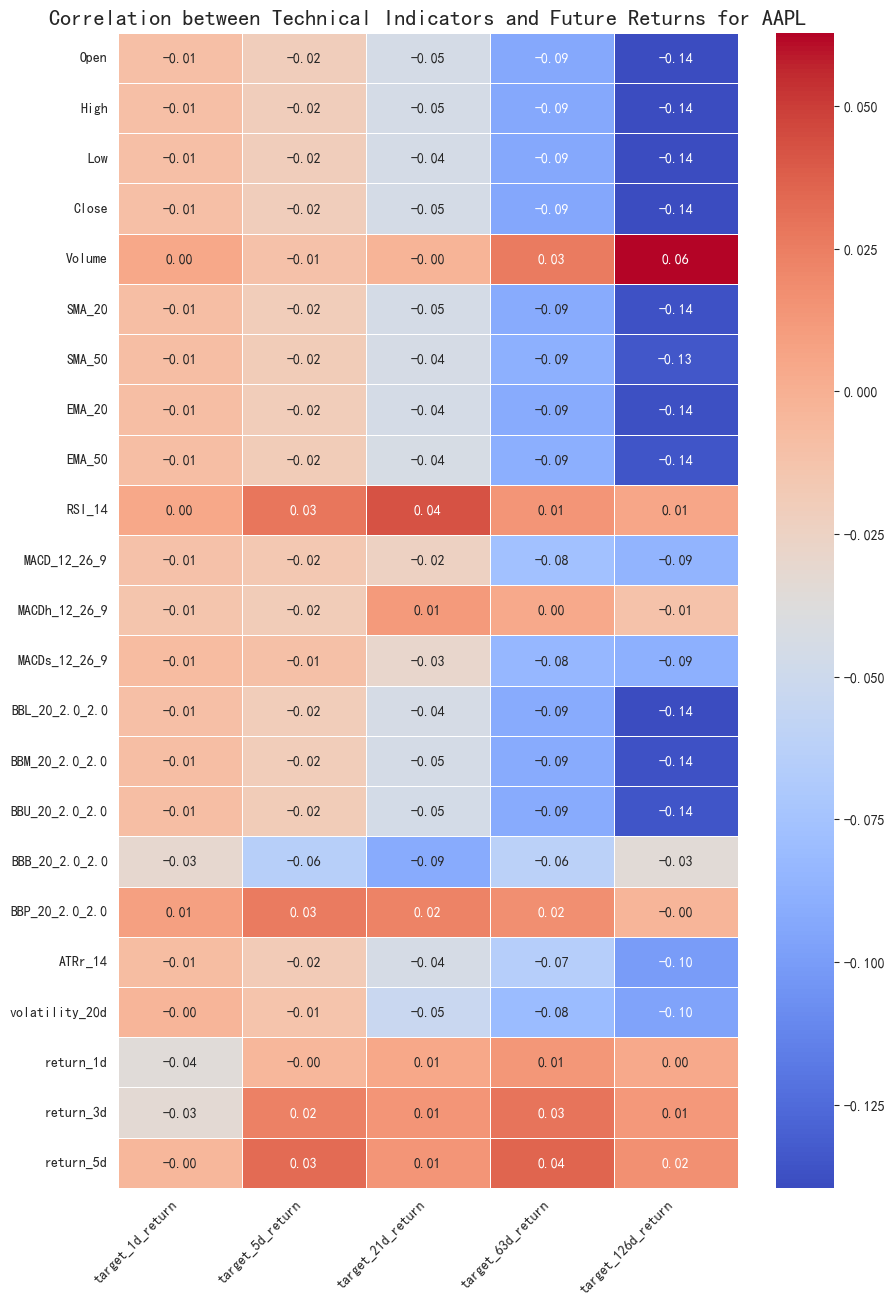

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 稳健的数据加载逻辑 ---
# 定义我们最终需要的数据文件路径
final_data_path = 'data/finalized/data_with_targets.csv'
final_df = None

# 首先，尝试从文件加载数据
# 这在你重启内核后非常有用
try:
    # 使用 index_col='Date' 和 parse_dates=True 会让后续时间序列操作更方便
    final_df = pd.read_csv(final_data_path, index_col='Date', parse_dates=True)
    print(f"Successfully loaded existing data from '{final_data_path}'.")
except FileNotFoundError:
    print(f"Error: File not found at '{final_data_path}'.")
    print("Please ensure the previous step to create the file was executed successfully and that the file is indeed present at this location.")
    # 如果文件不存在，我们停止执行，因为后续分析无法进行
    pass # 或者 raise FileNotFoundError("Cannot proceed, data file is missing!")

# --- 开始分析 (仅当数据成功加载后) ---
# 确保数据已加载，然后继续
if final_df is not None:
    
    # 为了让分析更清晰，我们先以一只股票为例，比如苹果 (AAPL)
    # 跨所有股票进行分析会混合不同股票的特性，可能会使结果模糊
    TICKER_TO_ANALYZE = 'AAPL'
    aapl_final_df = final_df[final_df['Ticker'] == TICKER_TO_ANALYZE].copy()
    
    # 在为单一股票分析时，'Ticker'列不再需要，可以删除
    aapl_final_df.drop(columns=['Ticker'], inplace=True)

    # 提取特征列和目标列的名称
    # 特征列是所有不包含 'target' 的列
    feature_cols = [col for col in aapl_final_df.columns if 'target' not in col]
    # 目标列是所有包含 'target' 的列
    target_cols = [col for col in aapl_final_df.columns if 'target' in col]

    # 计算完整的相关性矩阵
    correlation_matrix = aapl_final_df.corr()

    # 从大矩阵中只提取我们关心的部分：特征 vs. 目标
    corr_features_vs_targets = correlation_matrix.loc[feature_cols, target_cols]

    # 使用热力图 (Heatmap) 可视化这个相关性矩阵
    plt.figure(figsize=(10, 15)) # 创建一个足够大的画布
    sns.heatmap(
        corr_features_vs_targets,
        annot=True,               # 在每个格子上显示数值
        cmap='coolwarm',          # 使用冷暖色调 (蓝-白-红) 来表示负-零-正相关
        fmt='.2f',                # 将数值格式化为两位小数
        linewidths=.5             # 在格子之间添加细线
    )
    
    # 添加图表标题和标签
    plt.title(f'Correlation between Technical Indicators and Future Returns for {TICKER_TO_ANALYZE}', fontsize=16)
    plt.xticks(rotation=45, ha='right') # 旋转x轴标签以防重叠
    plt.yticks(rotation=0)
    plt.show()